# 言語処理100本ノック 2020 (Rev 2)



## 第7章: 単語ベクトル

### 60. 単語ベクトルの読み込みと表示

In [35]:
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

# https://stmind.hatenablog.com/entry/2017/06/18/230106
# https://blog.amedama.jp/entry/gensim-fasttext-pre-trained-word-vectors

import gensim

googlenews_w2v = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [10]:
print(googlenews_w2v["United_States"])
print(len(googlenews_w2v["United_States"]))


[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982


### 61. 単語の類似度

In [11]:
# https://qiita.com/Qiitaman/items/fa393d93ce8e61a857b1

import numpy as np

def cos_sim(v1, v2):
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

X = googlenews_w2v["United_States"]
Y = googlenews_w2v["U.S."]

print(cos_sim(X, Y))


0.7310775



### 62. 類似度の高い単語10件

In [13]:
# https://qiita.com/DancingEnginee1/items/b10c8ef7893d99aa53be

print(googlenews_w2v.most_similar('United_States'))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400725483894348), ('U.S.', 0.7310774922370911), ('theUnited_States', 0.6404394507408142), ('America', 0.6178409457206726), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019068956375122)]


### 63. 加法構成性によるアナロジー

In [14]:
# https://www.pc-koubou.jp/magazine/9905

googlenews_w2v.most_similar(positive=[u"Spain",u"Athens"], negative=["Madrid"],topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606847405433655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791338920593)]


### 64. アナロジーデータでの実験

In [29]:
import pandas as pd

cols=["category","v1","v2","v3","v4"]
df = pd.DataFrame(columns=cols)
with open('questions-words.txt') as f:
  for i,l in enumerate(f):
    s = l.strip().split()
    if s[0] == ':':
      cat = s[1]
    else:
      row = [cat]
      row += s
      df = df.append(pd.DataFrame([[cat]+s],columns=cols), ignore_index=True)
    # if i > 5:
      # break
df

,category,v1,v2,v3,v4
0,capital-common-countries,Athens,Greece,Baghdad,Iraq
1,capital-common-countries,Athens,Greece,Bangkok,Thailand
2,capital-common-countries,Athens,Greece,Beijing,China
3,capital-common-countries,Athens,Greece,Berlin,Germany
4,capital-common-countries,Athens,Greece,Bern,Switzerland
...,...,...,...,...,...
19539,gram9-plural-verbs,write,writes,talk,talks
19540,gram9-plural-verbs,write,writes,think,thinks
19541,gram9-plural-verbs,write,writes,vanish,vanishes
19542,gram9-plural-verbs,write,writes,walk,walks


In [92]:
# https://note.nkmk.me/python-pandas-map-applymap-apply/
# https://qiita.com/MysteriousMonkey/items/a238da520993f1f4b0cf

from tqdm.notebook import tqdm_notebook

def calc_most_similar(row):
  r = googlenews_w2v.most_similar(positive=[row["v2"],row["v3"]], negative=[row["v1"]],topn=1)
  print(r)
  return pd.Series( list(r)[0] )

tqdm_notebook.pandas(desc="progress: ")

#dh = pd.DataFrame(df.head())
df[["word","Score"]] = df.progress_apply(calc_most_similar,axis=1)

progress:   0%|          | 0/19544 [00:00<?, ?it/s]

[('Iraqi', 0.635187029838562)]
[('Thailand', 0.7137669920921326)]
[('China', 0.7235777378082275)]
[('Germany', 0.6734623312950134)]
[('Switzerland', 0.4919748306274414)]
[('Egypt', 0.7527808547019958)]
[('Australia', 0.5837324857711792)]
[('Viet_Nam', 0.6276342272758484)]
[('Cuba', 0.6460990905761719)]
[('Finland', 0.68999844789505)]
[('Pakistan', 0.7233324646949768)]
[('Afghan', 0.6160916090011597)]
[('Britain', 0.5646187663078308)]
[('Spain', 0.7036612629890442)]
[('Russia', 0.7382973432540894)]
[('Norway', 0.6470744013786316)]
[('Canada', 0.5912168622016907)]
[('France', 0.6724624037742615)]
[('Italy', 0.6826189756393433)]
[('Sweden', 0.6757245063781738)]
[('Iran', 0.7671369910240173)]
[('Japan', 0.725609540939331)]
[('Thailand', 0.6745353937149048)]
[('China', 0.6915649175643921)]
[('Germany', 0.6057409048080444)]
[('coach_Bobby_Curlings', 0.4347156882286072)]
[('Egypt', 0.6848487854003906)]
[('Mr_Rudd', 0.6186108589172363)]
[('Vietnam', 0.749355137348175)]
[('Cuba', 0.713325500488

In [93]:
df.to_csv('ch07-64-result.txt')
df

,category,v1,v2,v3,v4,word,Score
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,capital-common-countries,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,capital-common-countries,Athens,Greece,Beijing,China,China,0.723578
3,capital-common-countries,Athens,Greece,Berlin,Germany,Germany,0.673462
4,capital-common-countries,Athens,Greece,Bern,Switzerland,Switzerland,0.491975
...,...,...,...,...,...,...,...
19539,gram9-plural-verbs,write,writes,talk,talks,talked,0.544719
19540,gram9-plural-verbs,write,writes,think,thinks,thinks,0.617773
19541,gram9-plural-verbs,write,writes,vanish,vanishes,disappear,0.600271
19542,gram9-plural-verbs,write,writes,walk,walks,walks,0.553434



### 65. アナロジータスクでの正解率

- <https://www.soh-devlog.tokyo/nlp100-7-65/>

|意味的アナロジー|文法的アナロジー|
|--|--|
|capital-common-countries, capital-world, currency, city-in-state, family|gram1-adjective-to-adverb, gram2-opposite, gram3-comparative, gram4-superlative, gram5-present-participle, gram6-nationality-adjective, gram7-past-tense, gram8-plural, gram9-plural-verbs|



In [79]:
df["category"].unique()

array(['capital-common-countries', 'capital-world', 'currency',
       'city-in-state', 'family', 'gram1-adjective-to-adverb',
       'gram2-opposite', 'gram3-comparative', 'gram4-superlative',
       'gram5-present-participle', 'gram6-nationality-adjective',
       'gram7-past-tense', 'gram8-plural', 'gram9-plural-verbs'],
      dtype=object)

In [81]:
sem = df[~df["category"].str.contains("gram")]
syn = df[df["category"].str.contains("gram")]

In [85]:
print("意味的アナロジー({})正解率：{}".format(len(sem), (sem["v4"] == sem["word"]).sum() / len(sem)))
print("文法的アナロジー({})正解率：{}".format(len(syn), (syn["v4"] == syn["word"]).sum() / len(syn)))

意味的アナロジー(8869)正解率：0.0004510091329349419
文法的アナロジー(10675)正解率：0.0


In [87]:
sem[sem["v4"]!=sem["word"]]

,category,v1,v2,v3,v4,word,Score
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
5,capital-common-countries,Athens,Greece,Cairo,Egypt,NaN,NaN
6,capital-common-countries,Athens,Greece,Canberra,Australia,NaN,NaN
7,capital-common-countries,Athens,Greece,Hanoi,Vietnam,NaN,NaN
8,capital-common-countries,Athens,Greece,Havana,Cuba,NaN,NaN
...,...,...,...,...,...,...,...
8864,family,uncle,aunt,son,daughter,NaN,NaN
8865,family,uncle,aunt,sons,daughters,NaN,NaN
8866,family,uncle,aunt,stepbrother,stepsister,NaN,NaN
8867,family,uncle,aunt,stepfather,stepmother,NaN,NaN



### 66. WordSimilarity-353での評価

In [95]:
df = pd.read_table('wordsim353/combined.tab')
df

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
...,...,...,...
348,shower,flood,6.03
349,weather,forecast,8.34
350,disaster,area,6.25
351,governor,office,6.34


In [104]:

def calc_similarity(row):
  return googlenews_w2v.similarity(row["Word 1"],row["Word 2"])

#dh = pd.DataFrame(df.head())

df["comp_similarity"] = df.apply(calc_similarity, axis=1)



In [105]:
df

,Word 1,Word 2,Human (mean),comp_simlarity,comp_similarity
0,love,sex,6.77,0.263938,0.263938
1,tiger,cat,7.35,0.517296,0.517296
2,tiger,tiger,10.00,1.000000,1.000000
3,book,paper,7.46,0.363463,0.363463
4,computer,keyboard,7.62,0.396392,0.396392
...,...,...,...,...,...
348,shower,flood,6.03,0.129479,0.129479
349,weather,forecast,8.34,0.362721,0.362721
350,disaster,area,6.25,0.145228,0.145228
351,governor,office,6.34,0.296636,0.296636


In [108]:
df[["Human (mean)","comp_similarity"]] .corr(method="spearman")

,Human (mean),comp_similarity
Human (mean),1.000000,0.700017
comp_similarity,0.700017,1.000000



### 67. k-meansクラスタリング

In [111]:
countries = pd.read_excel('country-code-2020-iso-obp.xlsx')
countries.head()

,English short name,French short name,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,Afghanistan (l'),AF,AFG,4
1,Albania,Albanie (l'),AL,ALB,8
2,Algeria,Algérie (l'),DZ,DZA,12
3,American Samoa,Samoa américaines (les),AS,ASM,16
4,Andorra,Andorre (l'),AD,AND,20


In [117]:
from sklearn.cluster import KMeans
import numpy as np

c_vecs = []
c_names = []
for c in countries["English short name"]:
  if c in googlenews_w2v:
    c_vecs.append(googlenews_w2v[c])
    c_names.append(c)

N_CLUSTERS = 5

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0)
kmeans.fit(c_vecs)

for i in range(N_CLUSTERS):
  cluster = np.where(kmeans.labels_ ==i)[0]
  print("cluster:",i)
  print(",".join([ c_names[j] for j in cluster ]))



cluster: 0
Antarctica,Fiji,Guam,Kiribati,Maldives,Nauru,Niue,Palau,Samoa,Tokelau,Tonga,Tuvalu,Vanuatu
cluster: 1
Afghanistan,Algeria,Angola,Bahrain,Bangladesh,Benin,Bhutan,Botswana,Burundi,Cambodia,Cameroon,Chad,China,Djibouti,Egypt,Eritrea,Ethiopia,Gabon,Ghana,Guinea,India,Indonesia,Iraq,Kenya,Kuwait,Kyrgyzstan,Lebanon,Lesotho,Liberia,Libya,Madagascar,Malawi,Malaysia,Mali,Mauritania,Mongolia,Morocco,Mozambique,Myanmar,Namibia,Nepal,Nigeria,Oman,Pakistan,Qatar,Rwanda,Senegal,Singapore,Somalia,Tajikistan,Thailand,Togo,Tunisia,Turkmenistan,Uganda,Uzbekistan,Yemen,Zambia,Zimbabwe
cluster: 2
Albania,Andorra,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bulgaria,Canada,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Georgia,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Latvia,Liechtenstein,Lithuania,Luxembourg,Macao,Malta,Monaco,Montenegro,Norway,Poland,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine
cluster: 3
Ang


### 68. Ward法によるクラスタリング

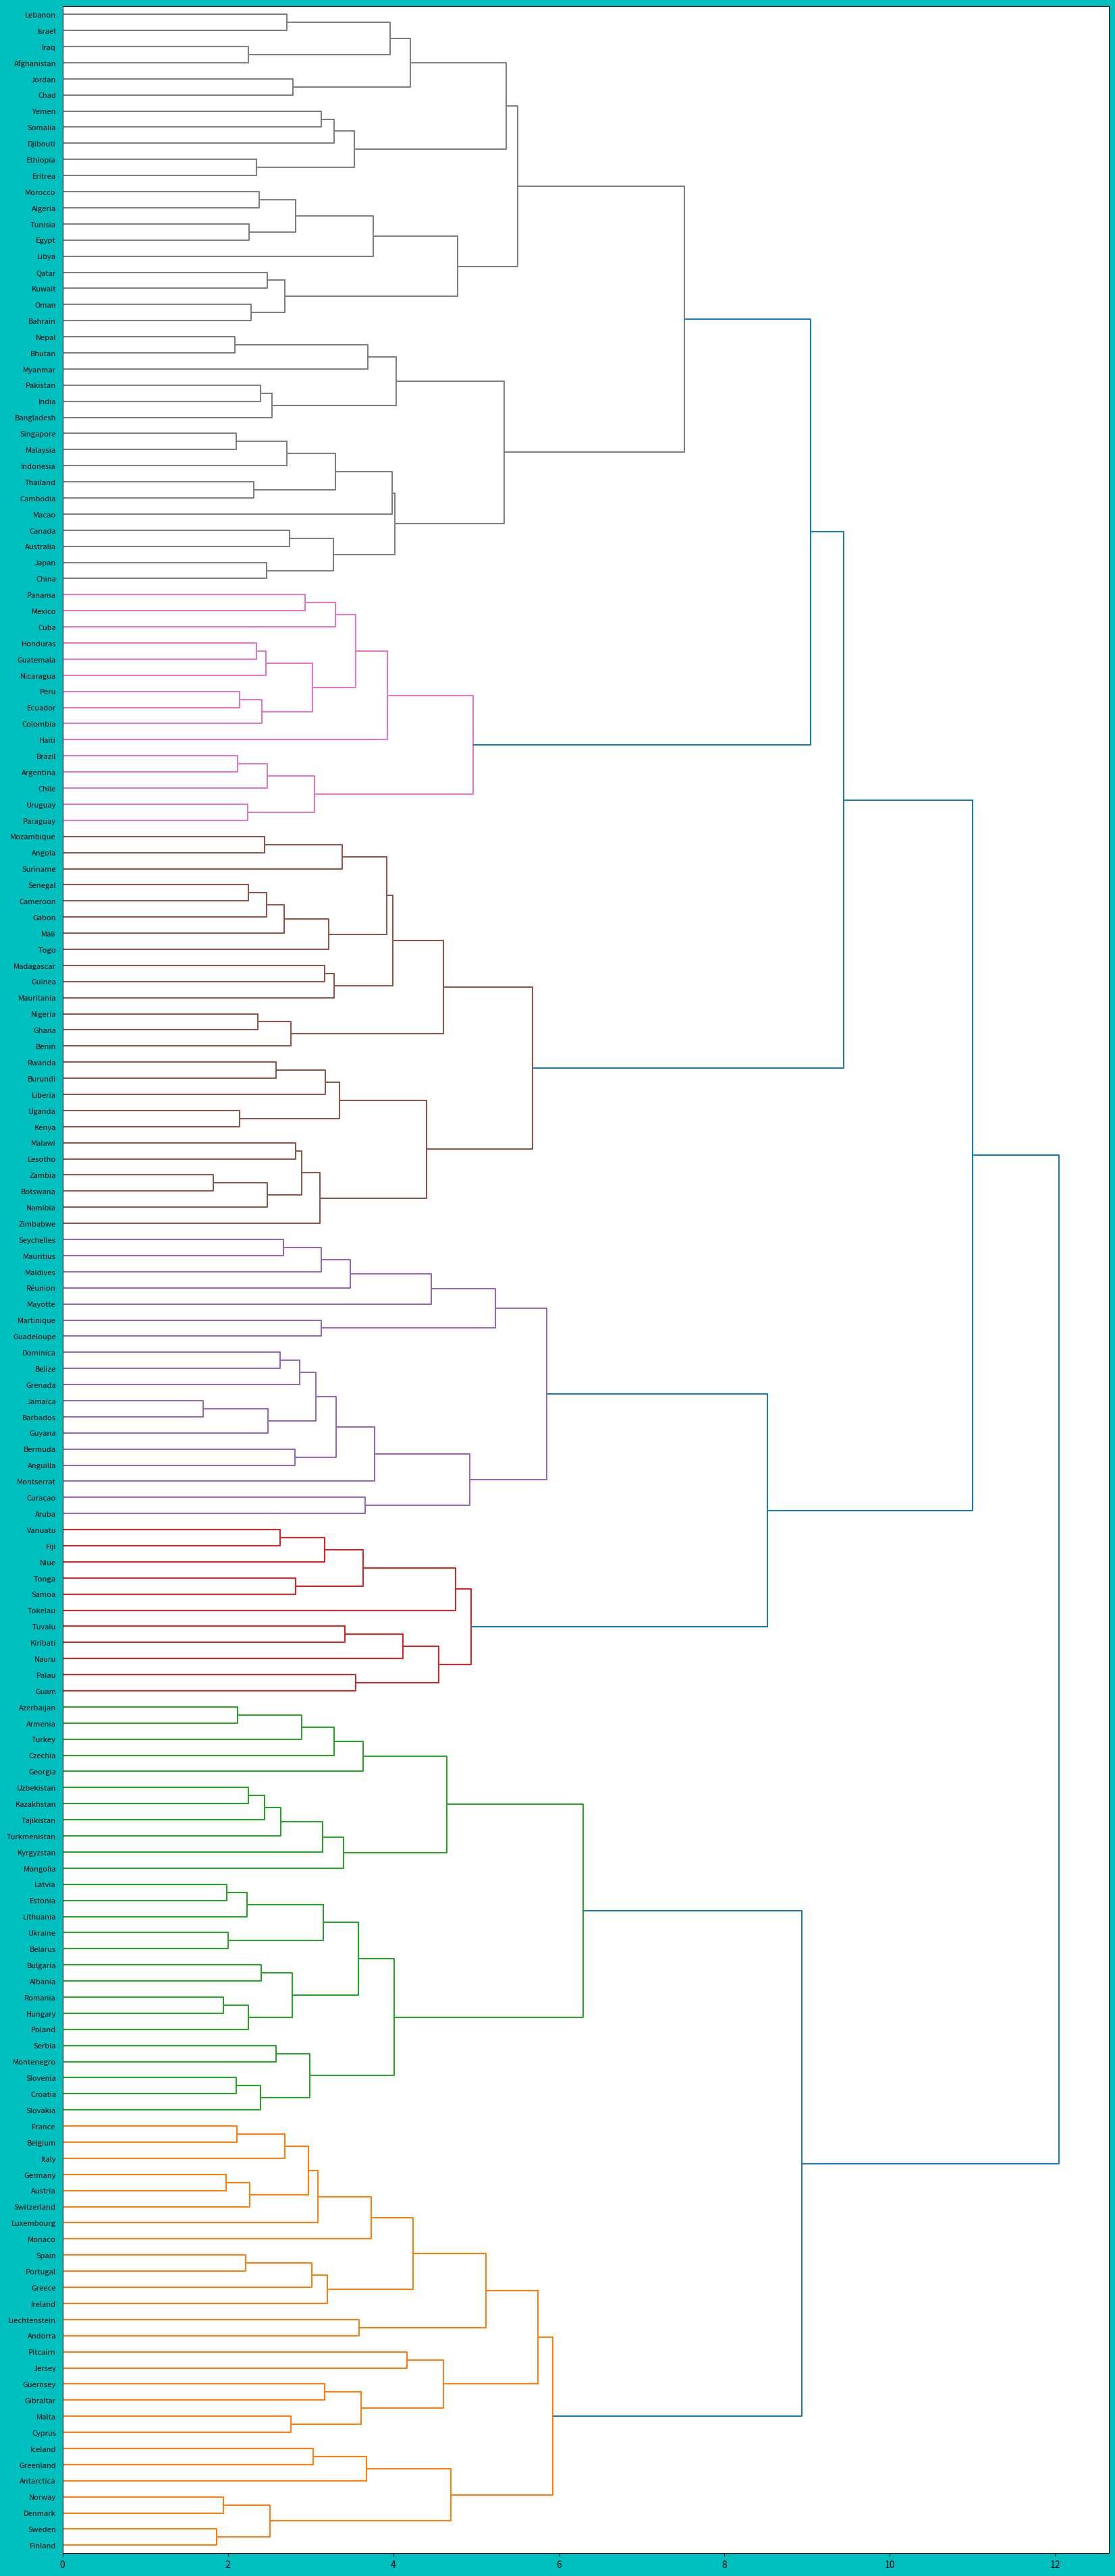

In [130]:
# https://wagtail.cds.tohoku.ac.jp/coda/python/machine-learning/clustering-2.html
# https://qiita.com/FukuharaYohei/items/8648da8bbad27c841479

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

clustered = linkage(c_vecs,'ward')

# 結果のプロット
plt.figure(figsize=(20, 50), dpi=100, facecolor='c')
dendrogram(clustered, labels=c_names, leaf_font_size=8, orientation='right')
#dendrogram(clustered, labels=c_names)
plt.show()



### 69. t-SNEによる可視化

/home/masaru/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


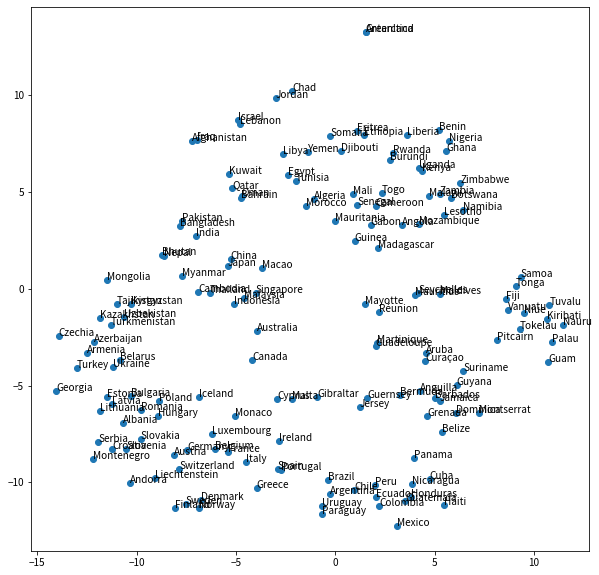

In [132]:
# https://qiita.com/g-k/items/120f1cf85ff2ceae4aba
# https://www.takapy.work/entry/2021/06/20/191606

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np


# 圧縮(次元削減？)
tsne = TSNE(random_state=42, n_iter=15000, metric='cosine')
embs = tsne.fit_transform(c_vecs)

# プロット
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embs).T[0], np.array(embs).T[1])
for (x, y), name in zip(embs, c_names):
    plt.annotate(name, (x, y))
plt.show()


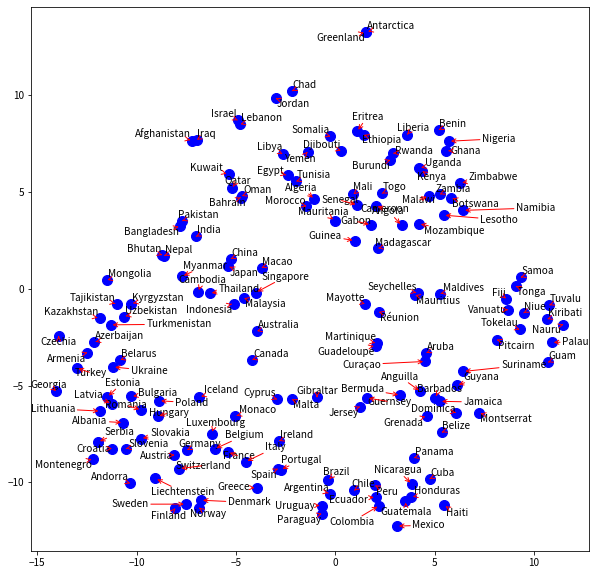

In [136]:
# adjust_textを用いてちょっとみやすくプロット
from adjustText import adjust_text

texts = []
fig, ax = plt.subplots(figsize=(10, 10))
for x, y, name in zip(np.array(embs).T[0], np.array(embs).T[1], c_names):
    ax.plot(x, y, marker='o', linestyle='', ms=10, color='blue')
    plt_text = ax.annotate(name, (x, y), fontsize=10, color='black')
    texts.append(plt_text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

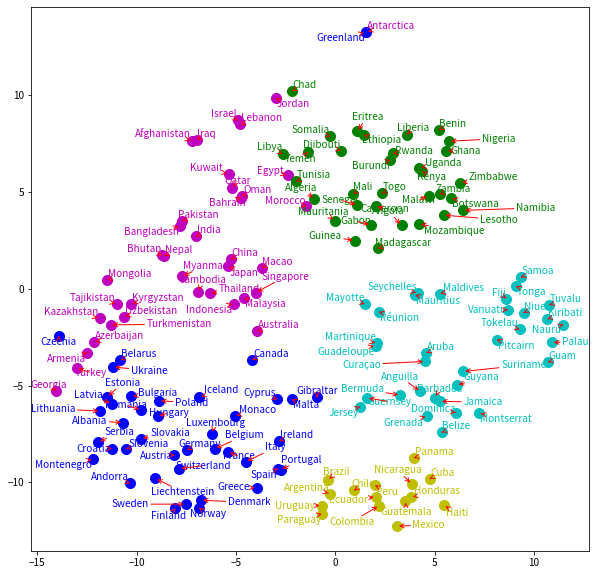

In [137]:
# クラスタごとに色分けして出力
n = 5
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(c_vecs)
km_labels = kmeans.labels_
texts = []
fig, ax = plt.subplots(figsize=(10, 10))
for x, y, name, cluster in zip(np.array(embs).T[0], np.array(embs).T[1], c_names, km_labels):
    if cluster == 0:
        ax.plot(x, y, marker='o', linestyle='', ms=10, color='g')
        plt_text = ax.annotate(name, (x, y), fontsize=10, color='g')
    elif cluster == 1:
        ax.plot(x, y, marker='o', linestyle='', ms=10, color='b')
        plt_text = ax.annotate(name, (x, y), fontsize=10, color='b')
    elif cluster == 2:
        ax.plot(x, y, marker='o', linestyle='', ms=10, color='m')
        plt_text = ax.annotate(name, (x, y), fontsize=10, color='m')
    elif cluster == 3:
        ax.plot(x, y, marker='o', linestyle='', ms=10, color='c')
        plt_text = ax.annotate(name, (x, y), fontsize=10, color='c')
    else:
        ax.plot(x, y, marker='o', linestyle='', ms=10, color='y')
        plt_text = ax.annotate(name, (x, y), fontsize=10, color='y')
    texts.append(plt_text)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='r'))
plt.show()

